In [38]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import os
import tqdm

from dataset_utils import mkdir_if_missing
from skimage import io

In [42]:
DATASET_DIR = "/nfs/diskstation/projects/dex-net/segmentation/datasets/wisdom-sim-block-npy"
OUT_DIR = "/nfs/diskstation/projects/dex-net/segmentation/datasets/mask-net"
mkdir_if_missing(OUT_DIR)
mkdir_if_missing(os.path.join(OUT_DIR, "train"))
mkdir_if_missing(os.path.join(OUT_DIR, "val-train"))
mkdir_if_missing(os.path.join(OUT_DIR, "val-one-shot"))
mkdir_if_missing(os.path.join(OUT_DIR, "test-train"))
mkdir_if_missing(os.path.join(OUT_DIR, "test-one-shot"))

# input image size
IM_HEIGHT = 384
IM_WIDTH = 512

# 1:3 ratio between im_size and tar_size
IM_SIZE = 384
TAR_SIZE = 128

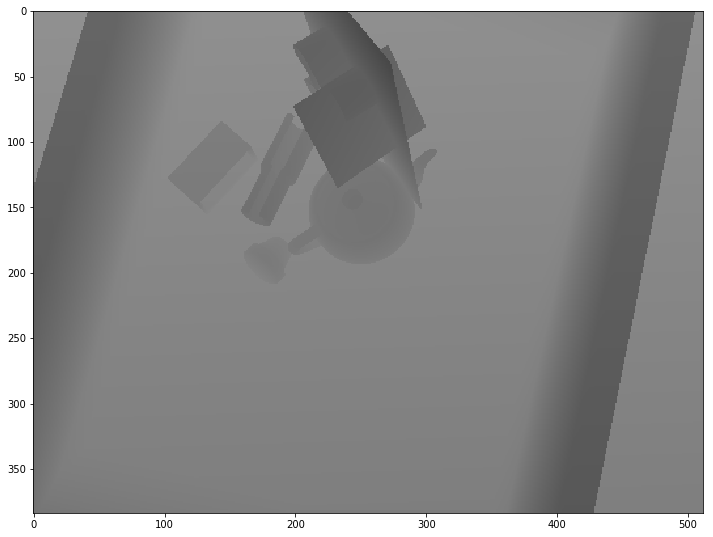

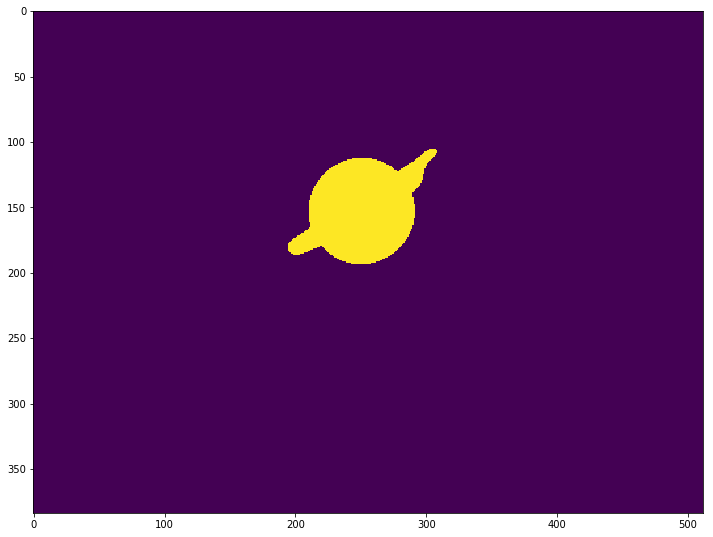

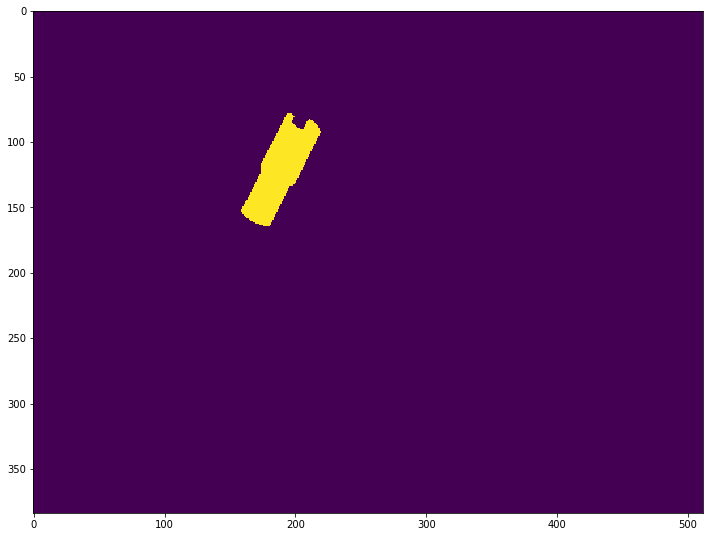

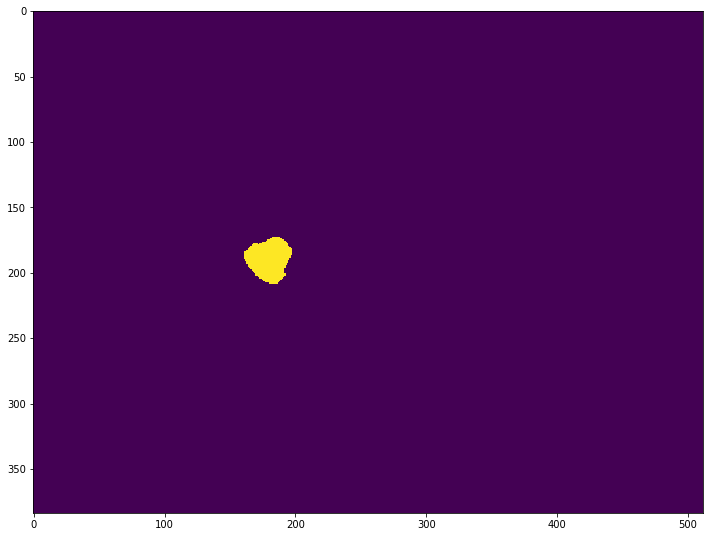

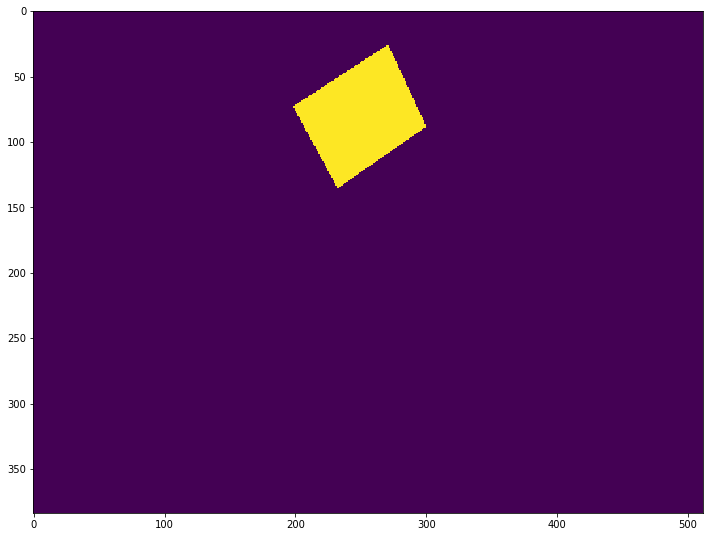

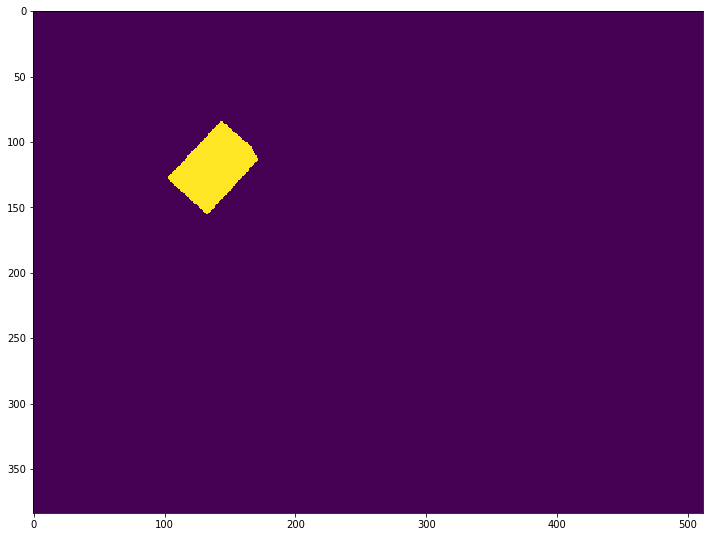

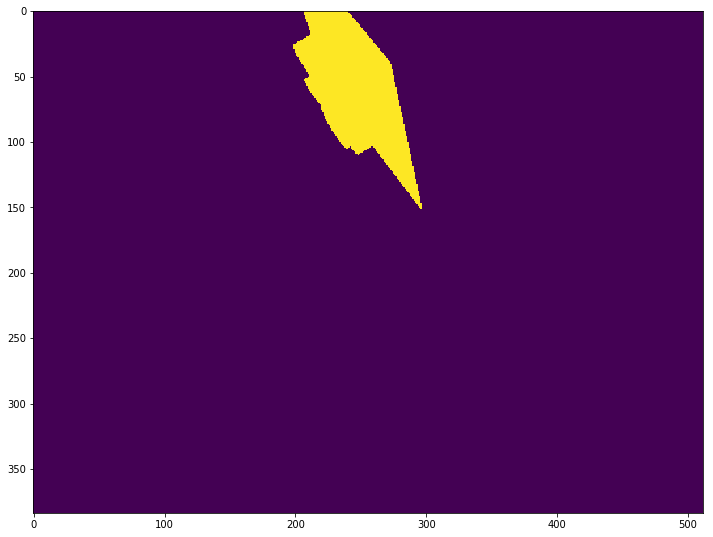

In [44]:
def isolate_target(modal_mask):
    top, bot, left, right = bbox(modal_mask)
    
    
def bbox(im):
    rows = np.any(im, axis=1)
    cols = np.any(im, axis=0)
    rmin, rmax = np.where(rows)[0][[0, -1]]
    cmin, cmax = np.where(cols)[0][[0, -1]]

    return rmin, rmax, cmin, cmax

for im_idx in range(1):
    im_path = os.path.join(
        DATASET_DIR,
        "depth_ims",
        "image_{:06d}.png".format(im_idx))
    im = io.imread(im_path)
    plt.figure()
    plt.imshow(im)
    for mask_idx in range(11):
        channel_name = "image_{:06d}_channel_{:03d}.png".format(im_idx, mask_idx)
        amodal_path = os.path.join(
            DATASET_DIR,
            "amodal_segmasks",
            channel_name)
        amodal_mask = io.imread(amodal_path, as_gray=True)
        
        # if there is no amodal mask, object doesn't exist.
        if len(np.unique(amodal_mask)) == 1:
            break
            
        modal_path = os.path.join(
            DATASET_DIR,
            "modal_segmasks",
            channel_name)
        modal_mask = io.imread(modal_path, as_gray=True)
        plt.figure()
        plt.imshow(amodal_mask)


        